# Inroduction to regression with neural network in TensorFlow

There are many definitions for regression problems but in out case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [133]:
import tensorflow as tf
tf.__version__

'2.13.0'

# Creating a data to View and Fit

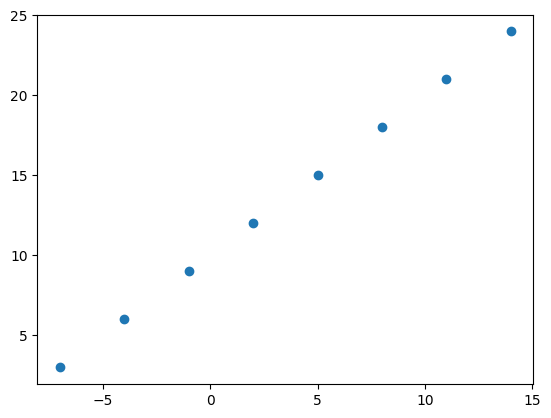

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)

In [135]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [136]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info,house_price
# Ip shape is 3 and Op shape is 1

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [137]:
X[0],y[0]

(-7.0, 3.0)

In [138]:
ip_shape = X.shape
op_shape = y.shape
ip_shape,op_shape

((8,), (8,))

In [139]:
# Turn our numpy arrays into tensors with dtype float32 - ip should be in tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# **Steps in modelling with TensorFlow**
1. **Creating a model** - define the ip and op layers, as well as the hidden layers of a DL model.
2. **Compiling a model** - define the loss function (in other words, the function which tell our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels)

In [140]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) #hidden layer - 1 neuron
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 311ms/step - loss: 8.1319 - mae: 8.1319
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 7.9994 - mae: 7.9994
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 7.8669 - mae: 7.8669
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 7.7344 - mae: 7.7344
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 7.6019 - mae: 7.6019


In [141]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [142]:
# Try and make prediction using our model
y_pred = model.predict([17.0]) # X=17 so op should be y = x+10 that is 27
y_pred
#gives a far off op

1/1 [==============================] - 0s 55ms/step


array([[29.098547]], dtype=float32)

# Improving our model
We can improve our model, by altering the steps we took to create a model

1. **Creating a model:** here we might add more layers, increase the no. of hidden unites (all called neurons) within each of the hidde layers, change the activiation fucntion of each layer.

2. **Compiling a model:** here we might change the optimization function or perhaps the learning rate of the optimization function.

3. **Fitting a model:**here we might fit a model for more epochs (leave it training for longer) or on more data (give model more examples to learn from).

In [143]:
# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) #hidden layer - 1 neuron
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 628ms/step - loss: 15.5123 - mae: 15.5123
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 15.2311 - mae: 15.2311
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 14.9590 - mae: 14.9590
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 14.8265 - mae: 14.8265
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 14.6940 - mae: 14.6940
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 14.5615 - mae: 14.5615
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 14.4290 - mae: 14.4290
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 14.2965 - mae: 14.2965
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 14.1640 - mae: 14.1640
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 14.0315 - mae: 14.0315
Epoch 11/100
1/1 [==============================] - 0

In [144]:
# Now let's see if model's prediction has improved
model.predict([17.0])
# see the difference between epochs 5 and 100. we came close to the prediction

1/1 [==============================] - 0s 51ms/step


array([[29.440365]], dtype=float32)

In [145]:
# Let's see if we can make another change to improve the model

# 1. Create the model (this time with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([tf.keras.layers.Dense(100,activation=None),
        tf.keras.layers.Dense(1)])

# 2.Compile the model
model.compile(loss="mae",
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])

# 3.Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 429ms/step - loss: 13.3250 - mae: 13.3250
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 13.2339 - mae: 13.2339
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 13.1429 - mae: 13.1429
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 13.0520 - mae: 13.0520
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 12.9610 - mae: 12.9610
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 12.8701 - mae: 12.8701
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 12.7791 - mae: 12.7791
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 12.6880 - mae: 12.6880
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 12.5969 - mae: 12.5969
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 12.5057 - mae: 12.5057
Epoch 11/300
1/1 [==============================] - 0s

In [146]:
model.predict([17.0])
# From activation = "relu", we changed it to none. hence we get 29.1,
# else it would  be 31

# Note: improving a model dont always result in a better model

# we got 27.5 - close enough

1/1 [==============================] - 0s 70ms/step


array([[27.549406]], dtype=float32)

# Evaluating a model
in practice, a typical workflow you'll go through when building neural network is:

`build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it`

when it comes to evaluation, `visualization` is very important

* What `data` are we working with? what does it look like?
* what does our `model` look like?
* The `training` of a model - how does a model perform while it learns?
* How do the `predictions` of the model line up against the ground truth (the original labels)?

In [147]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [148]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

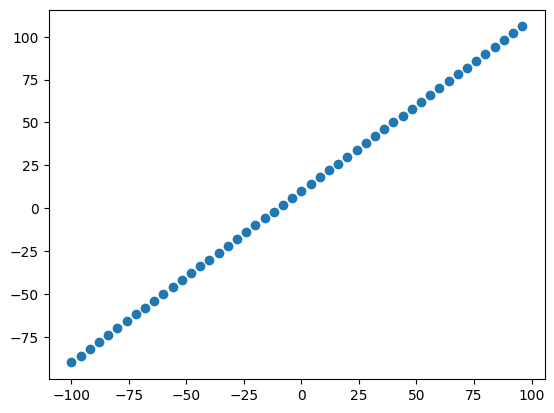

In [149]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

# Concept of 2 Sets
80% - training set and 20% - testing set

In [150]:
len(X)

50

In [151]:
# Split the data into train and test sets
X_train = X[:40] #first 40 samples out of 50
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

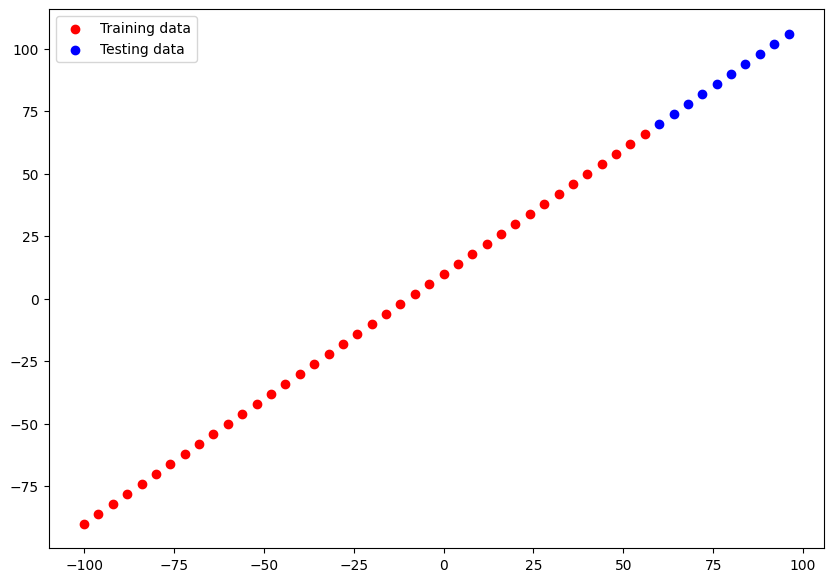

In [152]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="r",label = "Training data")
plt.scatter(X_test,y_test,c="b",label = "Testing data")
plt.legend()

In [153]:
# Building another neural network for our data
# 1.Create a model
model = tf.keras.Sequential([tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
                             tf.keras.layers.Dense(1,name="Output_layer")],
                            name = "model_1")
# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3.Fit the model
model.summary()
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

#dense is also called fully connected layer

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
model.fit(X_train,y_train,epochs=100,verbose=0)

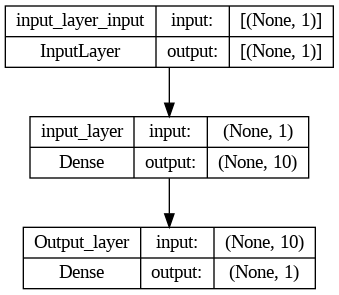

In [155]:
from tensorflow.keras.utils import plot_model
plot_model(model = model,
           show_shapes = True)

# Visualizing our model's predictions
Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [156]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 61ms/step


array([[ 70.398155],
       [ 74.97758 ],
       [ 79.55701 ],
       [ 84.13643 ],
       [ 88.71585 ],
       [ 93.29528 ],
       [ 97.8747  ],
       [102.45412 ],
       [107.03354 ],
       [111.61297 ]], dtype=float32)

In [157]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [158]:
# Let's create a plotting function

# Function is used becuse we can reuse this in future
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label = "Training Data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label = "Testing Data")
  # Plot model's predicitions in red
  plt.scatter(test_data,predictions,c="r",label = "Predictions")
  # Show the legend
  plt.legend();

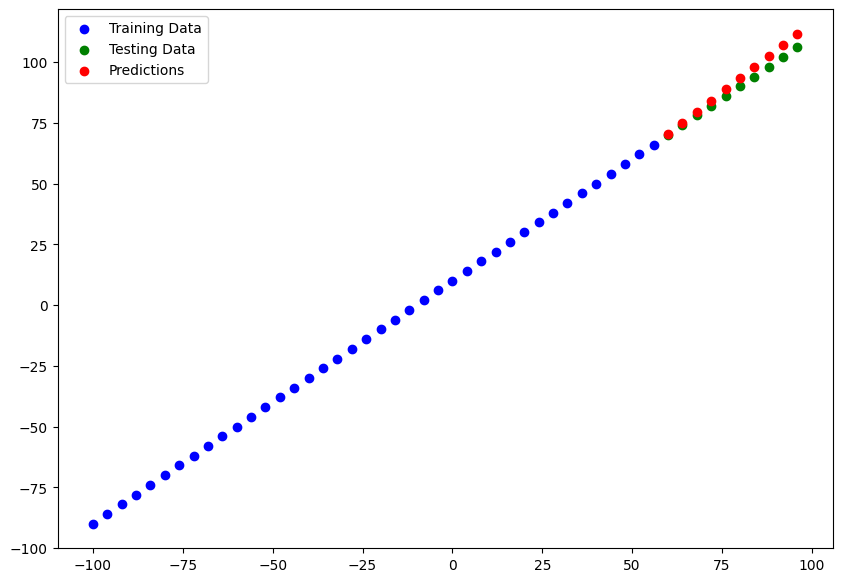

In [159]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions= y_pred)

# Evaluating our model's predictions with regression evaluation metrics
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

`* Mean absolute error (MAE)` - the mean
difference between each of the predictions. ("`on avg, how wrong is each of my model's predictions`")

`* Mean squared error (MSE)` - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better. ("`square the avg errors`")

You can also use `model.evaluate()` which will return the loss of the model as well as any metrics setup during the compile step.

In [160]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 115ms/step - loss: 3.0056 - mae: 3.0056


[3.0055618286132812, 3.0055618286132812]

In [161]:
#MAE
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae
# this value and model.evaluate value is same

<tf.Tensor: shape=(), dtype=float32, numpy=3.0055625>

In [162]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.398155,  74.97758 ,  79.55701 ,  84.13643 ,  88.71585 ,
        93.29528 ,  97.8747  , 102.45412 , 107.03354 , 111.61297 ],
      dtype=float32)>

In [163]:
tf.metrics.mean_squared_error(y_true = y_test,
                              y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=11.80319>

In [164]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
def mse(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))

# Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

`Get more data` - get more examples for your model to train on (more opportunities to learn patterns).

`Make your model larger (use a more complex model)` - this might come in the form of more layers or more hidden units in each layer.

`Train for longer` - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

`model_1` - same as original model, 1 layer, trained for 50 epochs.

`model_2` - 2 layers, trained for 100 epochs.

`model_3` - 2 layers, trained for 500 epochs.

# Build `model_1`

In [165]:
tf.random.set_seed(42)
#1. Create model
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 8ms/step - loss: 12.0340 - mae: 12.0340
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 13.1726 - mae: 13.1726
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 11.8387 - mae: 11.8387
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 9.2406 - mae: 9.2406
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 10.1015 - mae: 10.1015
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 9.3711 - mae: 9.3711
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 8.5201 - mae: 8.5201
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 9.0341 - mae: 9.0341
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 18.6372 - mae: 18.6372
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 10.0462 - mae: 10.0462
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 8.3678

In [166]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

1/1 [==============================] - 0s 166ms/step


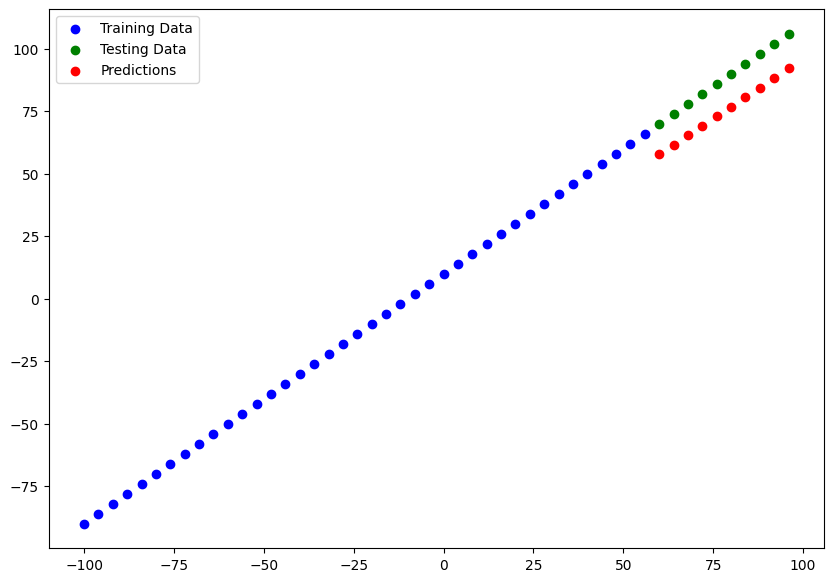

In [167]:
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [168]:
mae_1 = mae(y_test, tf.squeeze(y_preds_1)).numpy()
mse_1 = mse(y_test, tf.squeeze(y_preds_1)).numpy()
mae_1, mse_1

(13.028119, 13.028119)

# Build `model_2`

In [169]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 42.2021 - mse: 2649.0168
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.7439 - mse: 803.9892
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.1147 - mse: 1284.7025
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 13.4960 - mse: 247.2021
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 18.1700 - mse: 446.7079
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5742 - mse: 104.3648
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 12.4023 - mse: 200.7434
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9827 - mse: 142.9052
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 39.0930 - mse: 2381.9487
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 26.6681 - mse: 999.7493
Epoch 11/100
2/2 [=============================

1/1 [==============================] - 0s 49ms/step


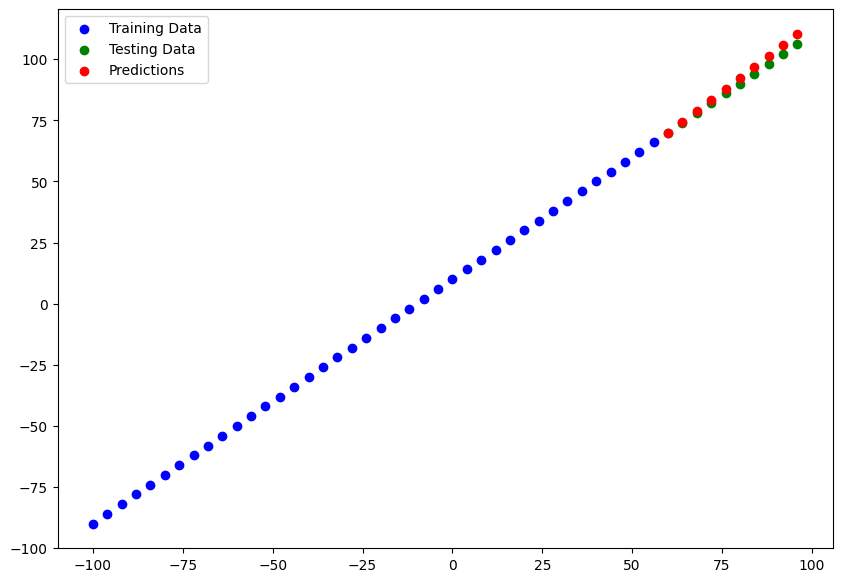

In [170]:
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [171]:
mae_2 = mae(y_test, tf.squeeze(y_preds_2)).numpy()
mse_2 = mse(y_test, tf.squeeze(y_preds_2)).numpy()
mae_2, mse_2

(2.0802162, 2.0802162)

# Build `model_3`

In [172]:
tf.random.set_seed(42)
#1.
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])
#2.
model_3.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3.
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 42.1704 - mae: 42.1704
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 10.9730 - mae: 10.9730
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 27.1096 - mae: 27.1096
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 13.7355 - mae: 13.7355
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 15.2658 - mae: 15.2658
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 12.1290 - mae: 12.1290
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.4446 - mae: 11.4446
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1981 - mae: 11.1981
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 41.8798 - mae: 41.8798
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 29.0975 - mae: 29.0975
Epoch 11/500
2/2 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 49ms/step


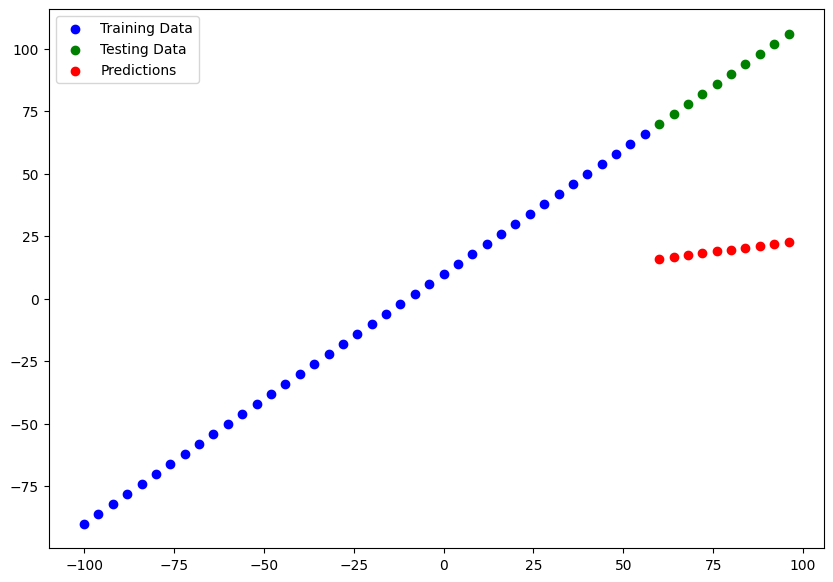

In [173]:
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [174]:
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.69987>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.69987>)

# Comparing results of our models

In [175]:
# Let's compare out model's results using pandas Dataframe
import pandas as pd
mr = [
    ["Model 1", np.array(mae_1), np.array(mse_1)],
    ["Model 2", np.array(mae_2), np.array(mse_2)],
    ["Model 3", np.array(mae_3), np.array(mse_3)]
]

all_results = pd.DataFrame(mr, columns=["Models", "Mae", "Mse"])
all_results
# lower the better. model 1 is better

,Models,Mae,Mse
0,Model 1,13.028119,13.028119
1,Model 2,2.0802162,2.0802162
2,Model 3,68.69987,68.69987


# Tracking your experiments
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 `Resource`: But as you build more models, you'll want to look into using tools such as:

`TensorBoard` - a component of the TensorFlow library to help track modelling experiments (we'll see this later).

`Weights & Biases` - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1. `The SavedModel format` (default).
2. `The HDF5 format`.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [176]:
# Save a model using SavedModel format
model_1.save("Best_model_SavedModel_format")
# get saved as folder

In [177]:
# Save model using the HDF5 format
model_1.save("Best_Model_HDF5_format.h5")
# get saved as file

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading in a saved model

In [178]:
 # SavedModel format
loaded_sm = tf.keras.models.load_model("Best_model_SavedModel_format")
loaded_sm.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [179]:
model_1.summary()
# both are same

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [180]:
# Compare model_1 predictions with SavedModel format model perdictions
model_1_preds = model_1.predict(X_test)
loaded_sm_pred = loaded_sm.predict(X_test)
model_1_preds == loaded_sm_pred

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [181]:
# Load in a model using .h5 format
loaded_h5 = tf.keras.models.load_model("/content/Best_Model_HDF5_format.h5")
loaded_h5.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [182]:
# Check to see if loaded .h5 model predictions match model 1
model_2_preds = model_2.predict(X_test)
loaded_h5_preds = loaded_h5.predict(X_test)
model_2_preds == loaded_h5_preds
# should get true but its false dk why

1/1 [==============================] - 0s 34ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

# Download a model (or any other file) from Google colab
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

1. Right click on the file in the files pane and right click file, go to 'download'.
2. Use the code below (first cell below)
3. Save it to Google Drive and copying it there (second cell below)

In [183]:
# Download a file from Google colab
from google.colab import files
files.download("/content/Best_Model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [184]:
!cp /content/Best_Model_HDF5_format.h5 /content/drive/MyDrive/Colab Notebooks/02_neural_network_with_tf.ipynb

cp: target 'Notebooks/02_neural_network_with_tf.ipynb' is not a directory


In [185]:
! ls /content/drive/MyDrive/Colab Notebooks/02_neural_network_with_tf.ipynb

ls: cannot access '/content/drive/MyDrive/Colab': No such file or directory
ls: cannot access 'Notebooks/02_neural_network_with_tf.ipynb': No such file or directory


# A Larger Example

In [186]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [187]:
# Read the insurance dataset (machine learning cost dataset - kaggle)
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [188]:
# we have to turn the non-numerical columns into numerical. always the first process in DL
# one hot encoding - categorical variables to numerical variables

insurance_onehot = pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [190]:
# Creae X & y values (features and labels)
# every column except charges
X = insurance_onehot.drop("charges",axis=1)
y = insurance_onehot["charges"]

In [191]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [192]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [202]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

#`MODEL - 1`

In [205]:
# Build a neural network (sort of like model 1 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8833.1084 - mae: 8833.1084
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7871.2925 - mae: 7871.2925
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7501.0840 - mae: 7501.0840
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7787.3242 - mae: 7787.3242
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7688.7466 - mae: 7688.7466
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7645.5000 - mae: 7645.5000
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7545.2510 - mae: 7545.2510
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7735.7837 - mae: 7735.7837
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7554.0786 - mae: 7554.0786
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7694.0874 - mae: 7694.0874

In [206]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7054.6631 - mae: 7054.6631


[7054.6630859375, 7054.6630859375]

In [208]:
y_train.median(), y_train.mean()
# comparing these values to mae that we got as op above says that the model is bad.

(9575.4421, 13346.089736364485)

#`MODEL - 2`
The model isn't performing well, let's try and improve it
To try to improve our model,
1. add extra layer
2. train for longer


In [212]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)])
#one layer added

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])
# SGD changed to Adam()

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13316.8682 - mae: 13316.8682
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13164.6768 - mae: 13164.6768
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12855.2285 - mae: 12855.2285
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12249.1934 - mae: 12249.1934
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11207.9893 - mae: 11207.9893
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9790.3916 - mae: 9790.3916
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8386.6133 - mae: 8386.6133
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7592.0547 - mae: 7592.0547
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7431.0342 - mae: 7431.0342
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7408.4600 - mae:

In [214]:
# Evaluating
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4954.8184 - mae: 4954.8184


[4954.818359375, 4954.818359375]

In [215]:
insurance_model.evaluate(X_test, y_test)
# see the mae diff btwn the previous one and now

9/9 [==============================] - 0s 2ms/step - loss: 7054.6631 - mae: 7054.6631


[7054.6630859375, 7054.6630859375]

#`MODEL - 3`

In [223]:
# Improving again
tf.random.set_seed(42)

# 1.
insurance_model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)])
# 2.
insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])
# 3.
history = insurance_model_3.fit(X_train, y_train, epochs = 300, verbose =1)

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 13316.9141 - mae: 13316.9141
Epoch 2/300
34/34 [==============================] - 0s 1ms/step - loss: 13204.3047 - mae: 13204.3047
Epoch 3/300
34/34 [==============================] - 0s 1ms/step - loss: 12941.5605 - mae: 12941.5605
Epoch 4/300
34/34 [==============================] - 0s 1ms/step - loss: 12386.0967 - mae: 12386.0967
Epoch 5/300
34/34 [==============================] - 0s 1ms/step - loss: 11388.8457 - mae: 11388.8457
Epoch 6/300
34/34 [==============================] - 0s 1ms/step - loss: 9975.5723 - mae: 9975.5723
Epoch 7/300
34/34 [==============================] - 0s 1ms/step - loss: 8514.4326 - mae: 8514.4326
Epoch 8/300
34/34 [==============================] - 0s 1ms/step - loss: 7624.7588 - mae: 7624.7588
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 7431.0205 - mae: 7431.0205
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 7405.2173 - mae:

In [224]:
# Evaluate
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3231.3318 - mae: 3231.3318


[3231.331787109375, 3231.331787109375]

In [225]:
insurance_model.evaluate(X_test, y_test)
# see the mae diff btwn the previous one and now

9/9 [==============================] - 0s 2ms/step - loss: 7054.6631 - mae: 7054.6631


[7054.6630859375, 7054.6630859375]

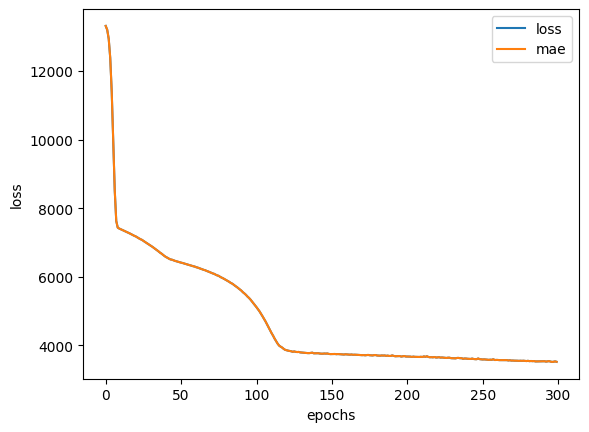

In [227]:
# Plot history (also kown as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

# Preprocessing data (Normalization and Standardization)
In terms of scaling values, neural networks tend to prefer normalization.


In [228]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

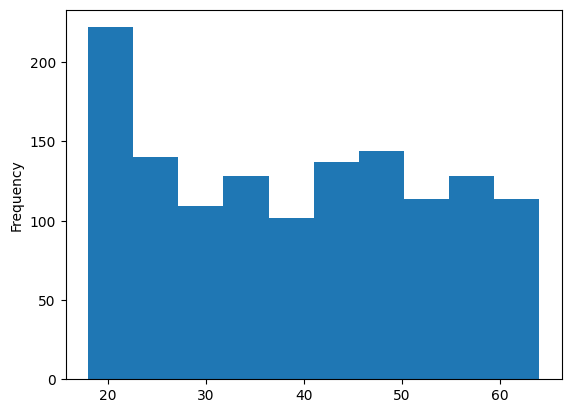

In [229]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

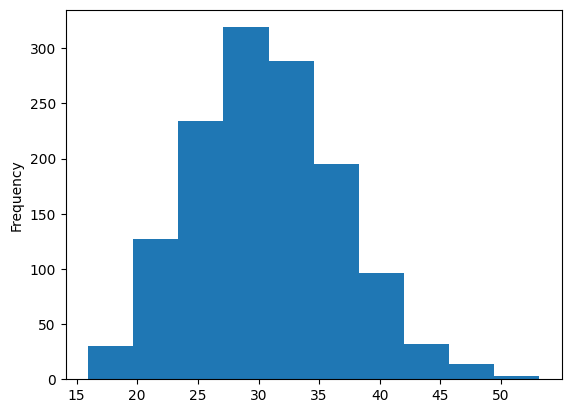

In [230]:
X["bmi"].plot(kind="hist")

In [232]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [240]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)


In [241]:
# What does our data look like now
X_train.loc[0] #originally looks like this

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [243]:
# Now like this
X_train_norm[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [245]:
X_train.shape, X_train_norm.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now let's build neural network model on it and see how it works

In [247]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)
# 1.
insurance_model_4 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)])
# 2.
insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])
# 3.
insurance_model_4.fit(X_train_norm, y_train, epochs = 100, verbose =1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.3467 - mae: 13344.3467
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13337.1104 - mae: 13337.1104
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13318.8838 - mae: 13318.8838
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13279.1670 - mae: 13279.1670
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13206.6768 - mae: 13206.6768
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13090.2627 - mae: 13090.2627
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12919.5342 - mae: 12919.5342
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12684.2695 - mae: 12684.2695
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12374.1455 - mae: 12374.1455
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11983.06

In [248]:
# Evaluate
insurance_model_4.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3439.2104 - mae: 3439.2104


[3439.21044921875, 3439.21044921875]

Compare this result with other model's results